In [1]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import scipy as sp
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC

In [2]:
import re
import string
from sklearn.preprocessing import StandardScaler, LabelEncoder
import nltk
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter 
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from tqdm import tqdm
import keras
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
#import tensorflow as tf
import string
import re
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# Function to apply lemmatization and Remove Stopwords

def text_process(text):

    nopunct = [char for char in text if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    a = ''
    i = 0
    for i in range(len(nopunct.split())):
        b = WordNetLemmatizer().lemmatize(nopunct.split()[i], pos="v")
        a = a + b + ' '

    not_stopwords = ""
    for word in a.split():
        if word.lower():
            not_stopwords = not_stopwords + word + " "
    
    return not_stopwords

In [4]:
df = pd.read_csv("./enron.csv")
df = df.drop(["Email Folder"], axis=1)
top_authors = df.value_counts(["Folder"])[:5]
df = df.loc[df["Folder"].isin(list(top_authors.index.get_level_values(0)))].drop(["Unnamed: 0"], axis=1).reset_index(drop=True)
df = df[df["Text"]!=" "]
df = df[df["Text"]!="\n"]
df = df.dropna()

In [6]:
# Dropping rows with NAN values & applying text_process function

df = pd.read_csv("Enron_29_Features.csv").drop(["Unnamed: 0"], axis=1)
df = df[df["Email Length"].notna()]
df = df[df["Author"].notna()]
df["Processed Text"] = df["Text"].apply(lambda row: text_process(row))

In [6]:
df["Folder"].value_counts()

mann-k          4000
kaminski-v      4000
dasovich-j      4000
germany-c       4000
shackleton-s    4000
Name: Folder, dtype: int64

In [7]:
def uniform_distribution(samples_per_author, df):
    df3 = pd.DataFrame(columns=["Author", "Folder", "File", "Text", "Raw Text"]) 
    for folder in df["Folder"].unique():
        df3 = df3.append(df[df["Folder"]==folder].sample(n=samples_per_author), ignore_index=True)
    return df3

In [8]:
df = uniform_distribution(4000, df)
print(df["Folder"].value_counts())
df

C:\Users\gupta\AppData\Local\Temp\ipykernel_58400\4195127566.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df[df["Folder"]==folder].sample(n=samples_per_author), ignore_index=True)
C:\Users\gupta\AppData\Local\Temp\ipykernel_58400\4195127566.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df3 = df3.append(df[df["Folder"]==folder].sample(n=samples_per_author), ignore_index=True)


mann-k          4000
kaminski-v      4000
dasovich-j      4000
germany-c       4000
shackleton-s    4000
Name: Folder, dtype: int64


,Author,Folder,File,Text,Raw Text,Message ID,Email Length,Digit Density,Space Density,Number of Paragraphs,...,Polarity,Most Common POS,Single Sentence,Greeting,Most Common Word,Freq Most Common Word,Total Special Character Count,Max Occurring Special Char,Count of Max Special Char,Processed Text
0,Kay,mann-k,2557,Please tell Mike that I'm on a conference call...,Message-ID: <31959771.1075846091351.JavaMail.e...,31959771.1075846091351.,111.0,0.000000,0.306306,1.0,...,0.1000,VB,False,Please,Please,2.0,0.0,None,0.0,Please tell Mike that Im on a conference call ...
1,Kay,mann-k,4289,I would like a copy of the Pompano Beach and D...,Message-ID: <21516078.1075846024223.JavaMail.e...,21516078.1075846024223.,73.0,0.000000,0.246575,1.0,...,0.2000,NNP,True,I,I,1.0,0.0,None,0.0,I would like a copy of the Pompano Beach and D...
2,Kay,mann-k,820,I would go with Sheila's approach. I don't se...,Message-ID: <9400430.1075846048402.JavaMail.ev...,9400430.1075846048402.,50.0,0.000000,0.340000,2.0,...,0.0000,PRP,False,I,I,2.0,0.0,None,0.0,I would go with Sheilas approach I dont see a ...
3,"Mann, Kay",mann-k,184,I called her office and they told me. What ti...,Message-ID: <14086915.1075861732933.JavaMail.e...,14086915.1075861732933.,131.0,0.000000,0.312977,3.0,...,0.0000,NN,False,I,I,2.0,0.0,None,0.0,I call her office and they tell me What time F...
4,Kay,mann-k,3975,FYI.\n,Message-ID: <16471880.1075846125731.JavaMail.e...,16471880.1075846125731.,3.0,0.000000,0.333333,1.0,...,0.0000,NNP,True,FYI,FYI,1.0,0.0,None,0.0,FYI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Sara,shackleton-s,545,Please take a look and call. SS\n,Message-ID: <24079141.1075844529869.JavaMail.e...,24079141.1075844529869.,24.0,0.000000,0.291667,1.0,...,0.0000,NN,True,Please,Please,1.0,0.0,None,0.0,Please take a look and call SS
19996,Sara,shackleton-s,5489,Dana:\n\nMark Taylor asked that I look into th...,Message-ID: <8304353.1075844908526.JavaMail.ev...,8304353.1075844908526.,207.0,0.159420,0.227053,2.0,...,0.2000,NNP,False,Dana,me,2.0,5.0,(,2.0,Dana Mark Taylor ask that I look into this for...
19997,Sara,shackleton-s,2489,fyi\n,Message-ID: <15045704.1075844578786.JavaMail.e...,15045704.1075844578786.,3.0,0.000000,0.333333,1.0,...,0.0000,NN,True,fyi,fyi,1.0,0.0,None,0.0,fyi
19998,Sara,shackleton-s,1209,Had a conversation with PG&E this afternoon an...,Message-ID: <29646095.1075844547376.JavaMail.e...,29646095.1075844547376.,61.0,0.000000,0.229508,1.0,...,0.0000,NN,True,Had,Had,1.0,1.0,&,1.0,Had a conversation with PGE this afternoon and...


In [9]:
def text_process(text):
    #Remove Punctuation Marks
    text = text.lower()
    nopunct = ""
    clean_final = []
    for char in text:
        if re.match(r"\w", char) or re.match(r" ", char):
            nopunct += char
        elif re.match(r" ", char):
            nopunct += char
        else:
            nopunct += " "
    for word in nopunct.split():
        if not word in stop_words:
            clean_final.append(word)
    nopunct=" ".join(clean_final)
    return nopunct


In [12]:
df["Processed Text"] = df["Text"].apply(lambda row: text_process(row))
df["Processed Text"]

0        please tell mike conference call step wants co...
1        would like copy pompano beach deerfield site p...
2                  would go sheila approach see reason kay
3        called office told time friday name handle wor...
4                                                      fyi
                               ...                        
19995                             please take look call ss
19996    dana mark taylor asked look please give call s...
19997                                                  fyi
19998          conversation pg e afternoon almost finished
19999    mark pli 2 day seminar houston nov 5 6 would l...
Name: Text, Length: 20000, dtype: object

In [13]:
df["Tokens"] = df["Processed Text"].apply(lambda row: word_tokenize(row))

In [14]:
y = LabelEncoder().fit_transform(df["Folder"])

In [15]:
# Converts list of documents into document vectors

def vectorize(list_of_docs, model):

    features = []
    zero_vector = np.zeros(model.vector_size)

    for tokens in list_of_docs:
      
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
           
            features.append(zero_vector)

    return features



In [16]:
# Applying K-Fold cross-validation to train and test LogisticRegression

X = df["Tokens"].to_numpy()
kf = KFold(n_splits=10, random_state=1, shuffle=True)
i = 1
clf = LogisticRegression(n_jobs=1, C=1e5, max_iter=100000)
train_accuracies_lr = []
test_accuracies_lr = []
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    tokenized_docs = X_train
    model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=1, seed=42)
    vectorized_docs = vectorize(tokenized_docs, model=model)
    
    test_tokenized_docs = X_test
    test_vectorized_docs = vectorize(test_tokenized_docs, model=model)
    
    clf.fit(vectorized_docs, y_train)
    train_accuracies_lr.append(clf.score(vectorized_docs, y_train))
    test_accuracies_lr.append(clf.score(test_vectorized_docs, y_test))
    print("Round {}".format(i))
    print("Training Accuracy - {}".format(train_accuracies_lr[i-1]))
    print("Testing Accuracy - {}".format(test_accuracies_lr[i-1]))
    i = i + 1
print("Average Training Accuracy")
avg_train_acc_lr = sum(train_accuracies_lr)/len(train_accuracies_lr)
print(avg_train_acc_lr)
print("Average Testing Accuracy")
avg_test_acc_lr = sum(test_accuracies_lr)/len(test_accuracies_lr)
print(avg_test_acc_lr)


Round 1
Training Accuracy - 0.7225
Testing Accuracy - 0.7065
Round 2
Training Accuracy - 0.7222777777777778
Testing Accuracy - 0.6995
Round 3
Training Accuracy - 0.7259444444444444
Testing Accuracy - 0.694
Round 4
Training Accuracy - 0.7278888888888889
Testing Accuracy - 0.7235
Round 5
Training Accuracy - 0.7197777777777777
Testing Accuracy - 0.7045
Round 6
Training Accuracy - 0.735
Testing Accuracy - 0.723
Round 7
Training Accuracy - 0.7219444444444445
Testing Accuracy - 0.7435
Round 8
Training Accuracy - 0.7196111111111111
Testing Accuracy - 0.723
Round 9
Training Accuracy - 0.7192222222222222
Testing Accuracy - 0.7275
Round 10
Training Accuracy - 0.7325555555555555
Testing Accuracy - 0.72
Average Training Accuracy
0.7246722222222223
Average Testing Accuracy
0.7165


In [17]:
#We have used lemmatization and removed stop words if any

def text_process(text):
    lemmatiser = WordNetLemmatizer() 
    not_punct = [char for char in text if char not in string.punctuation]
    not_punct = ''.join(not_punct)
    a = ''
    i = 0
    for i in range(len(not_punct.split())):
        b = lemmatiser.lemmatize(not_punct.split()[i], pos="v")
        a = a + b + ' '

    not_stopwords = ""
    for word in a.split():
        if word.lower():
            not_stopwords = not_stopwords + word + " "
    
    return not_stopwords

In [18]:
#We have processed the text, where we have dropped rows having NaN values and used text_process function

df = pd.read_csv("./Enron_29_Features.csv").drop(["Unnamed: 0"], axis=1)
df = df[df["Email Length"].notna()]
df = df[df["Author"].notna()]
df["Processed Text"] = df["Text"].apply(lambda row: text_process(row))

In [19]:
# Encoding class names with LabelEncoder()

y = LabelEncoder().fit_transform(df["Folder"])

#Dropped all unrequired columns/attributes

X = df.drop(["Author", "File", "Raw Text", "Message ID", "Folder", "Text"], axis=1)

#Dropped rows having NaN values

X = X[X["Email Length"] != 0]
X = X[X["Average Word Length"].notna()]
X = X[X["Most Common Word"].notna()]
X = X.reset_index(drop=True)

In [20]:
# Dropping any columns with NAN values still remaining

for column in X.columns:
    if X[column].dropna().shape[0] != X.shape[0]:
        print(column)
        print(X[column].dropna().shape)

In [21]:
#Multinomial Naive Bayes Model Model -

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = MultinomialNB()
train_accuracies_mnb = []
test_accuracies_mnb = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["Email Length", "Digit Density", "Space Density", "Number of Paragraphs", "Average Sentences per Paragraph", "Average Word Length", "Average Sentence Length", "Polarity", "Subjectivity", "Short Word Ratio", "Punc Frequency", "Number Words", "Freq Most Common Word", "Total Special Character Count", "Count of Max Special Char"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "Processed Text"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Farewell Words", "Last Punc", "Punc after Greeting", "Greeting", "Most Common Word", "Freq Punc", "Most Common POS", "Single Sentence", "Greeting", "Most Common Word", "Max Occurring Special Char"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=4000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    
    fit_model = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_mnb.append(train_acc)
    test_accuracies_mnb.append(test_acc)
    
    i = i + 1
    

Y_pred = fit_model.predict(X_test_transform)
f1_mnb = f1_score(y_test, Y_pred, average = "micro")    
avg_train_acc_mnb = sum(train_accuracies_mnb)/len(train_accuracies_mnb)
avg_test_acc_mnb = sum(test_accuracies_mnb)/len(test_accuracies_mnb)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_mnb)
print("Average Testing Accuracy:")
print(avg_test_acc_mnb)
print("F1 Score:")
print(f1_mnb)
print("===========================")

Round 1
Training Accuracy
0.8140079121858806
Testing Accuracy
0.7864661654135339
Round 2
Training Accuracy
0.8107761742909678
Testing Accuracy
0.8030075187969925
Round 3
Training Accuracy
0.8140739915310898
Testing Accuracy
0.7888665997993982
Round 4
Training Accuracy
0.8126810786717183
Testing Accuracy
0.7993981945837513
Round 5
Training Accuracy
0.8129039447292178
Testing Accuracy
0.7848545636910732
Round 6
Training Accuracy
0.8132939603298418
Testing Accuracy
0.7953861584754263
Round 7
Training Accuracy
0.8124582126142188
Testing Accuracy
0.7948846539618857
Round 8
Training Accuracy
0.8140739915310898
Testing Accuracy
0.7818455366098295
Round 9
Training Accuracy
0.8126810786717183
Testing Accuracy
0.808926780341023
Round 10
Training Accuracy
0.8134053933585915
Testing Accuracy
0.7853560682046138
Average Training Accuracy:
0.8130355737914335
Average Testing Accuracy:
0.7928992239877527
F1 Score:
0.7853560682046138


In [22]:
#Random Forest Classifier Model -

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier()
train_accuracies_rf = []
test_accuracies_rf = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["Email Length", "Digit Density", "Space Density", "Number of Paragraphs", "Average Sentences per Paragraph", "Average Word Length", "Average Sentence Length", "Polarity", "Subjectivity", "Short Word Ratio", "Punc Frequency", "Number Words", "Freq Most Common Word", "Total Special Character Count", "Count of Max Special Char"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "Processed Text"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Farewell Words", "Last Punc", "Punc after Greeting", "Greeting", "Most Common Word", "Freq Punc", "Most Common POS", "Single Sentence", "Greeting", "Most Common Word", "Max Occurring Special Char"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=4000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    
    fit_model = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_rf.append(train_acc)
    test_accuracies_rf.append(test_acc)
    
    i = i + 1
    
Y_pred = fit_model.predict(X_test_transform)
f1_rf = f1_score(y_test, Y_pred, average = "micro")
avg_train_acc_rf = sum(train_accuracies_rf)/len(train_accuracies_rf)
avg_test_acc_rf = sum(test_accuracies_rf)/len(test_accuracies_rf)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_rf)
print("Average Testing Accuracy:")
print(avg_test_acc_rf)
print("F1 Score:")
print(f1_rf)
print("===========================")

Round 1
Training Accuracy
0.9916977767872068
Testing Accuracy
0.8671679197994987
Round 2
Training Accuracy
0.9911963002173065
Testing Accuracy
0.8756892230576441
Round 3
Training Accuracy
0.9910853577000223
Testing Accuracy
0.8781344032096289
Round 4
Training Accuracy
0.991196790728772
Testing Accuracy
0.880641925777332
Round 5
Training Accuracy
0.9913639402718966
Testing Accuracy
0.866098294884654
Round 6
Training Accuracy
0.991586806329396
Testing Accuracy
0.8716148445336008
Round 7
Training Accuracy
0.9915310898150211
Testing Accuracy
0.8731193580742227
Round 8
Training Accuracy
0.9914196567862714
Testing Accuracy
0.8650952858575727
Round 9
Training Accuracy
0.9910296411856474
Testing Accuracy
0.8856569709127382
Round 10
Training Accuracy
0.9914196567862714
Testing Accuracy
0.8671013039117352
Average Training Accuracy:
0.9913527016607813
Average Testing Accuracy:
0.8730319530018626
F1 Score:
0.8671013039117352


In [25]:
#Support Vector Classification Model -

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel = "linear")
train_accuracies_svc = []
test_accuracies_svc = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["Email Length", "Digit Density", "Space Density", "Number of Paragraphs", "Average Sentences per Paragraph", "Average Word Length", "Average Sentence Length", "Polarity", "Subjectivity", "Short Word Ratio", "Punc Frequency", "Number Words", "Freq Most Common Word", "Total Special Character Count", "Count of Max Special Char"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", TfidfVectorizer(), "Processed Text"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Farewell Words", "Last Punc", "Punc after Greeting", "Greeting", "Most Common Word", "Freq Punc", "Most Common POS", "Single Sentence", "Greeting", "Most Common Word", "Max Occurring Special Char"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=4000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    
    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    
    fit_model = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_svc.append(train_acc)
    test_accuracies_svc.append(test_acc)
    
    i = i + 1
    
Y_pred = fit_model.predict(X_test_transform)
f1_svc = f1_score(y_test, Y_pred, average = "micro")
avg_train_acc_svc = sum(train_accuracies_svc)/len(train_accuracies_svc)
avg_test_acc_svc = sum(test_accuracies_svc)/len(test_accuracies_svc)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_svc)
print("Average Testing Accuracy:")
print(avg_test_acc_svc)
print("F1 Score:")
print(f1_svc)
print("===========================")

Round 1
Training Accuracy
0.927007299270073
Testing Accuracy
0.8511278195488722
Round 2
Training Accuracy
0.9261157853680281
Testing Accuracy
0.8796992481203008
Round 3
Training Accuracy
0.9254513037664364
Testing Accuracy
0.8731193580742227
Round 4
Training Accuracy
0.9262870514820593
Testing Accuracy
0.8751253761283851
Round 5
Training Accuracy
0.9266770670826833
Testing Accuracy
0.8655967903711134
Round 6
Training Accuracy
0.9257298863383107
Testing Accuracy
0.8681043129388164
Round 7
Training Accuracy
0.9255627367951861
Testing Accuracy
0.8686058174523571
Round 8
Training Accuracy
0.9282371294851794
Testing Accuracy
0.8686058174523571
Round 9
Training Accuracy
0.9264542010251838
Testing Accuracy
0.8756268806419257
Round 10
Training Accuracy
0.9267327835970581
Testing Accuracy
0.8620862587763289
Average Training Accuracy:
0.9264255244210199
Average Testing Accuracy:
0.868769767950468
F1 Score:
0.8620862587763289


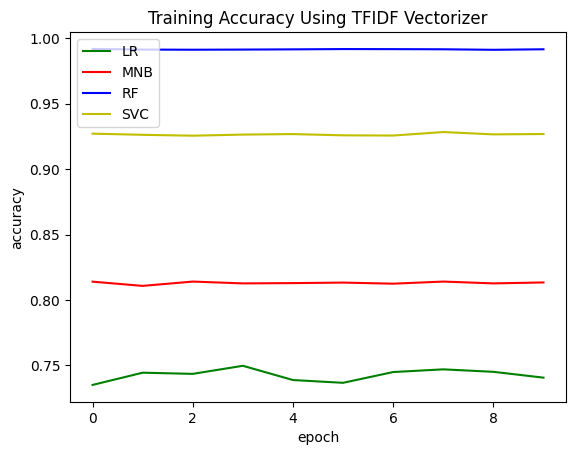

In [26]:
# comparing the Accuracies

plt.plot(train_accuracies_lr, 'g')
plt.plot(train_accuracies_mnb, 'r')
plt.plot(train_accuracies_rf, 'b')
plt.plot(train_accuracies_svc, 'y')
plt.title('Training Accuracy Using TFIDF Vectorizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LR', 'MNB', 'RF', 'SVC'], loc='upper left')
plt.show()

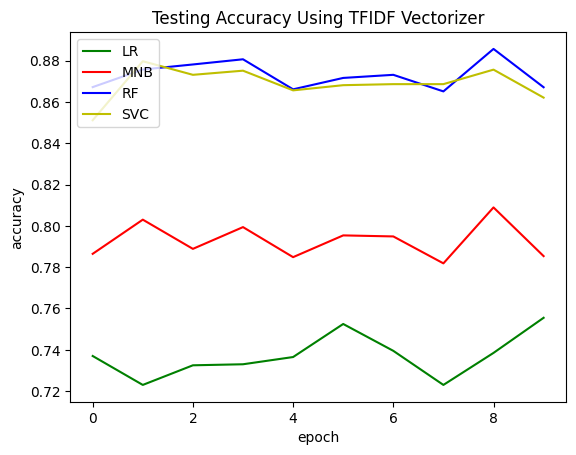

In [27]:
plt.plot(test_accuracies_lr, 'g')
plt.plot(test_accuracies_mnb, 'r')
plt.plot(test_accuracies_rf, 'b')
plt.plot(test_accuracies_svc, 'y')
plt.title('Testing Accuracy Using TFIDF Vectorizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LR', 'MNB', 'RF', 'SVC'], loc='upper left')
plt.show()

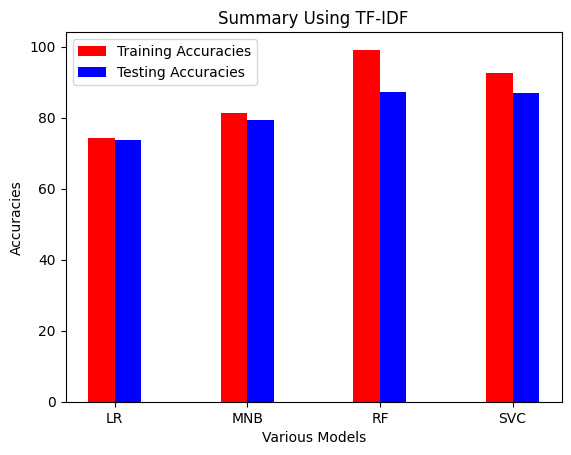

In [ ]:
#We will plot the graph to show the comparision between the accuracies for different models

all_avg_train_acc = [avg_train_acc_lr*100, avg_train_acc_mnb*100, avg_train_acc_rf*100, avg_train_acc_svc*100]
all_avg_test_acc = [avg_test_acc_lr*100, avg_test_acc_mnb*100, avg_test_acc_rf*100, avg_test_acc_svc*100]
x_axis = ["LR", "MNB", "RF", "SVC"]
x = np.arange(4)
width = 0.2
figure, axis = plt.subplots()
rect_a = axis.bar(x - width/2, all_avg_train_acc, width, label = "Training Accuracies", color = "r")
rect_b = axis.bar(x + width/2, all_avg_test_acc, width, label = "Testing Accuracies", color = "b")
axis.set_ylabel("Accuracies")
axis.set_title("Summary Using TF-IDF")
axis.set_xticks(x)
axis.set_xticklabels(x_axis)
axis.set_xlabel("Various Models")
axis.legend(loc = "upper left")

plt.show()